# 모두의 딥러닝 개정3판
## 16장 이미지 인식의 꽃, 컨볼루션 신경망(CNN)

- 불러온 이미지 데이터를 X
- 이미지에 0~9를 붙인 이름표를 y

In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt
import sys
import os
os.environ["KMP_DUPLICATE_LIB_OK"]='1'

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
print(X_train.shape[0])

60000


In [4]:
print(X_test.shape[0])

10000


In [5]:
print(X_train.shape) # 60000개의 글자가 들어가있는데 각 픽셀은 28x28

(60000, 28, 28)


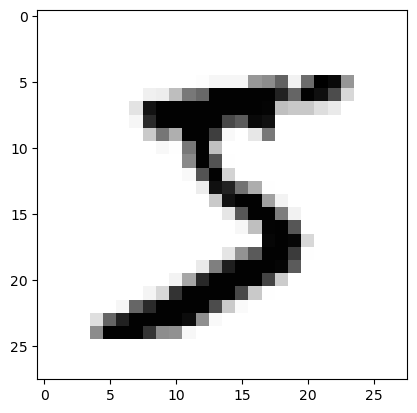

In [6]:
plt.imshow(X_train[0], cmap='Greys')
plt.show()

In [7]:
# 각 픽셀의 밝기정도에 따라 0~255
for x in X_train[0]:
    for i in x:
        sys.stdout.write('%-3s' % i)
    sys.stdout.write('\n')

0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  3  18 18 18 12613617526 1662552471270  0  0  0  
0  0  0  0  0  0  0  0  30 36 94 15417025325325325325322517225324219564 0  0  0  0  
0  0  0  0  0  0  0  49 23825325325325325325325325325193 82 82 56 39 0  0  0  0  0  
0  0  0  0  0  0  0  18 2192532532532532531981822472410  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  80 15610725325320511 0  43 1540  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  14 1  15425390 0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  1392531902  0  0  0  0  0  0  0 

In [8]:
from tensorflow.keras import models, layers
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

import numpy as np

In [9]:
# 주어진 가로 28, 세로 28의 2차원 배열을 784개의 1차원 배열로 바꿔줌
# 현재 0~255 사이의 값으로 이루어진 것을 0~1 사이의 값으로 바꿔줌
X_train = X_train.reshape(X_train.shape[0], 28*28).astype(float) / 255
X_test = X_test.reshape(X_test.shape[0], 28*28).astype(float) / 255

In [10]:
print(X_train[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [11]:
print(y_train[0])

5


In [12]:
# y_train의 값은 0~9의 수
# y_train을 갱신해줌
# pandas데이터가 아닌 numpy배열이기 때문에 getdummies를 못씀
# 대신 to_categorical를 써줘서 원-핫 인코딩 방식을 적용할수 있도록 갱신해주는것임
y_train = to_categorical(y_train)

In [13]:
print(y_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [14]:
y_test = to_categorical(y_test)

In [15]:
model = models.Sequential()
model.add(layers.Dense(512, input_dim=28*28, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [16]:
# 다중분류에서의 손실함수
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [17]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=10)

In [18]:
# 모델을 실행
history = model.fit(X_train, y_train, validation_split=0.25, epochs=30, batch_size=200, callbacks=[early_stop])

Epoch 1/30
225/225 [==============================] - 2s 5ms/step - loss: 0.3456 - accuracy: 0.9034 - val_loss: 0.1885 - val_accuracy: 0.9467
Epoch 2/30
225/225 [==============================] - 1s 4ms/step - loss: 0.1452 - accuracy: 0.9589 - val_loss: 0.1358 - val_accuracy: 0.9615
Epoch 3/30
225/225 [==============================] - 1s 4ms/step - loss: 0.0971 - accuracy: 0.9725 - val_loss: 0.1146 - val_accuracy: 0.9658
Epoch 4/30
225/225 [==============================] - 1s 4ms/step - loss: 0.0693 - accuracy: 0.9803 - val_loss: 0.0998 - val_accuracy: 0.9701
Epoch 5/30
225/225 [==============================] - 1s 4ms/step - loss: 0.0521 - accuracy: 0.9853 - val_loss: 0.0965 - val_accuracy: 0.9697
Epoch 6/30
225/225 [==============================] - 1s 4ms/step - loss: 0.0409 - accuracy: 0.9890 - val_loss: 0.0886 - val_accuracy: 0.9727
Epoch 7/30
225/225 [==============================] - 1s 4ms/step - loss: 0.0304 - accuracy: 0.9928 - val_loss: 0.0855 - val_accuracy: 0.9739
Epoch 

In [19]:
# 테스트의 정확도를 출력
print("Test Accuracy: %.4f" % (model.evaluate(X_test, y_test)[1]))

313/313 [==============================] - 1s 1ms/step - loss: 0.0719 - accuracy: 0.9812
Test Accuracy: 0.9812


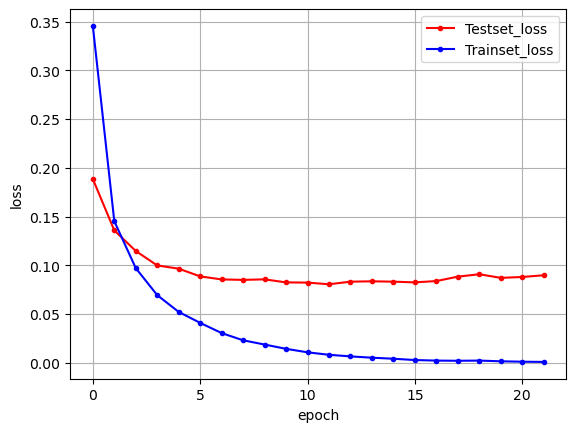

In [20]:
# 검증셋과 학습셋의 오차를 저장합니다. 
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

# 그래프로 표현해 봅니다.
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시해 보겠습니다.
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()